# Short Assignment 4 - Solutions

## Purpose

In this assignment you will have the opportunity to put to practice what we learned in class by:
1. complete a starter code that implements a Gaussian Mixture Model (GMM) optimized with the Expectation-Maximization (EM) algorithm
2. use your completed code to find the number of components needed on a given dataset
3. build a ROC curve from a given dataset

# Problem 1

**Suppose you have the following training data set:**

$$X=\{(1,1,2),(10,3,0),(-5,-4,1),(2,-3,1),(10,10,20),(0,0,0)\}$$

**with training labels**

$$y=\{-1,1,1,-1,-1,1\}$$

**where $y_i=1$ indicates a true target and $y_i=-1$ indicates a non-target data point. Suppose you trained a $k$-NN classifier to produce a confidence of target given a sample. For the above data points, your $k$-NN produced the following confidence values:**

$$c=\{0.7,0.6,0.2,0.3,0,0.9\}$$

**Answer the following questions:**

1. **Draw the associated ROC curve.**

2. **To make a final decision, suppose your threshold is $c=0.5$ (confidence value), where samples with confidence values $\leq 0.5$ are marked as non-target and samples with confidence values $>0.5$ are marked as target. What would be your resulting confusion matrix, FPR and TPR?**

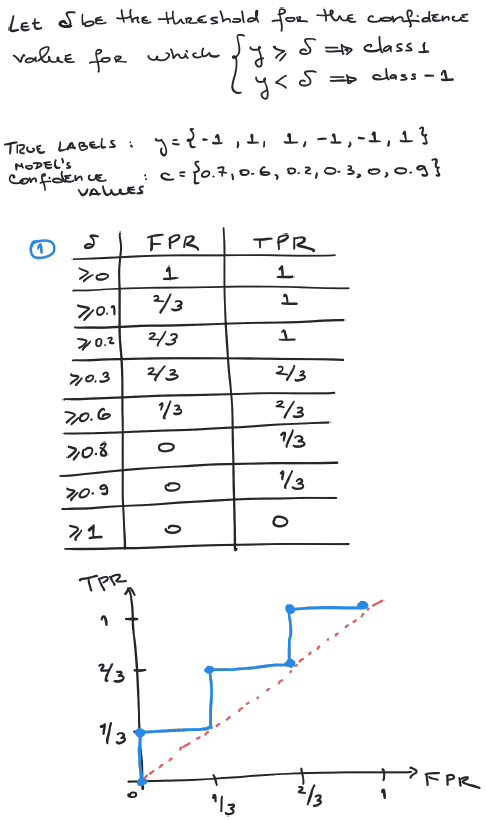

In [1]:
from IPython.display import Image
Image('Q1-1.png',width=400)

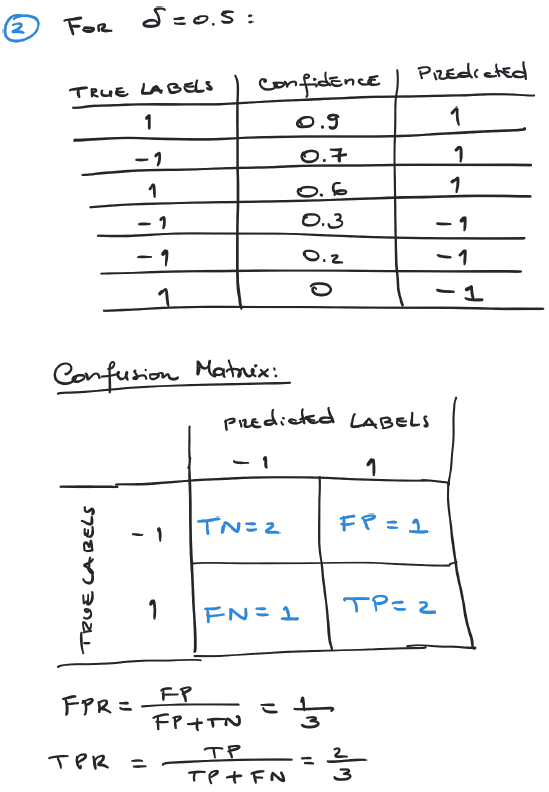

In [2]:
Image('Q1-2.png',width=400)

# Problem 2

**The starter code below is an incomplete implementation of the EM algorithm to optimize a Gaussian Mixture Model data likelihood.**

**In this problem, you will complete the provided code by filling in the empty slots (do not use any library or online implementations).**

In [3]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def EM_GaussianMixture(X, NumComponents, MaximumNumberOfIterations=100, DiffThresh=1e-4):
    '''This function implements the EM algorithm for a Gaussian Mixture Model'''
    
    # Size of the input data: N number of points, D features
    N, D = X.shape
    
    # Initialize Parameters of each Component K
    Means = np.zeros((NumComponents,D))
    Sigs = np.zeros(((D, D, NumComponents)))
    Ps = np.zeros(NumComponents)
    for i in range(NumComponents):
        rVal = np.random.uniform(0,1)
        Means[i,:] = X[max(1,round(N*rVal)),:]
        Sigs[:,:,i] = 1*np.eye(D)
        Ps[i] = 1/NumComponents
        
    # E-Step Solve for p(z | x, Theta(t)) = Cik
    pZ_X = np.zeros((N,NumComponents))
    for k in range(NumComponents):
        # Assign each point to a (multivariate) Gaussian component with probability pi(k)
        pZ_X[:,k] = multivariate_normal.pdf(X, Means[k,:], Sigs[:,:,k])*Ps[k]
    pZ_X = (pZ_X.T/np.sum(pZ_X,axis=1)).T 
    
    Diff = np.inf
    NumberIterations = 1
    while Diff > DiffThresh and NumberIterations < MaximumNumberOfIterations:
        ## M-step: Update Means, Sigs, Ps
        MeansOld = Means.copy()
        SigsOld = Sigs.copy()
        PsOld = Ps.copy()
        for k in range(NumComponents):
            ## Complete M-step: Update parameters
            #Means
            Means[k,:] = X.T@pZ_X[:,k]/sum(pZ_X[:,k])
            
            #Sigs
            xDiff = X-MeansOld[k,:]            
            J = np.zeros((D,D))
            for i in range(N):
                J = J + pZ_X[i,k]*np.outer(xDiff[i,:], xDiff[i,:])
            Sigs[:,:,k] = J / sum(pZ_X[:,k])
            
            #Ps
            Ps[k] = sum(pZ_X[:,k]) / N
            
        ## E-step: Solve for p(z | x, Theta(t))
        # Complete E-step
        for k in range(NumComponents):
            # Assign each point to a Gaussian component with probability pi(k)
            pZ_X[:,k] = multivariate_normal.pdf(X, Means[k,:], Sigs[:,:,k])*Ps[k]
        pZ_X = (pZ_X.T/np.sum(pZ_X,axis=1)).T
        
        Diff = sum(sum(abs(MeansOld - Means))) + sum(sum(sum(abs(SigsOld - Sigs)))) + sum(abs(PsOld - Ps))
        print('t = ',NumberIterations,': \t', Diff)
        NumberIterations = NumberIterations + 1
    return Means, Sigs, Ps, pZ_X

# Problem 3

**Using your code in problem 3, determine the mixture proportion, mean and (diagonal) covariance associated with each of the mixture component in the data contained in mixture.txt.**

**In your solution include:**

* **a plot where each data point is color-coded by their weight responsabilities (you have been provided with the plotting script).**

* **a plot where each data point is color-coded by their cluster membership.**

**Answer the following questions:**

1. **How many mixture components are found in the data?**

2. **How did you determine this?**

3. **What did you estimate for the mixture components, means and covariances associated with each mixture component?**

t =  1 : 	 8.615885097530127
t =  2 : 	 1.923084503479078
t =  3 : 	 1.7298428037223816
t =  4 : 	 1.6874550602114753
t =  5 : 	 1.2135826897596387
t =  6 : 	 0.76539928772985
t =  7 : 	 0.539143580167498
t =  8 : 	 0.49778616003946324
t =  9 : 	 0.4805907294631763
t =  10 : 	 0.4521922239405215
t =  11 : 	 0.45347646337681247
t =  12 : 	 0.4876856193112831
t =  13 : 	 0.5349820168972507
t =  14 : 	 0.5566707270489074
t =  15 : 	 0.5060026901973833
t =  16 : 	 0.3937033261212504
t =  17 : 	 0.27884982045795165
t =  18 : 	 0.2001327944117159
t =  19 : 	 0.1624973879640691
t =  20 : 	 0.13987597214257758
t =  21 : 	 0.12299285000410179
t =  22 : 	 0.1117509025505181
t =  23 : 	 0.1037693648987087
t =  24 : 	 0.09748817191773014
EM Algorithm. # Components: 5
---------------------
Component 1
Estimated Means
[0.45437837 1.0002461 ]
Estimated Covariances
[[ 0.14285273 -0.00095061]
 [-0.00095061  0.05884086]]
Estimated Weights
0.36416931437466327
---------------------
Component 2
Estimated M

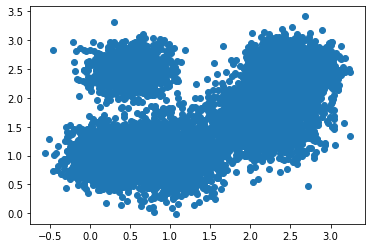

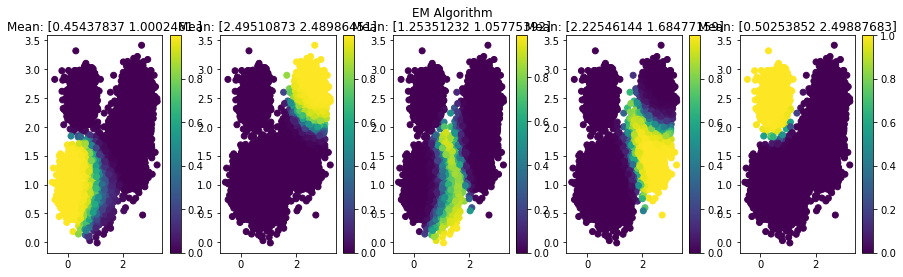

In [5]:
## Load Data
X = np.loadtxt('mixture.txt')
plt.scatter(X[:,0],X[:,1]);

## Set number of components
NumComponents = 5
EM_Means, EM_Sigs, EM_Ps, pZ_X = EM_GaussianMixture(X, NumComponents,50,0.1)

print('EM Algorithm. # Components: ' + str(NumComponents))
print('---------------------')
for i in range(NumComponents):
    print('Component '+str(i+1))
    print('Estimated Means')
    print(EM_Means[i,:])
    print('Estimated Covariances')
    print(EM_Sigs[:,:,i])
    print('Estimated Weights')
    print(EM_Ps[i])
    print('---------------------')
    
fig = plt.figure(figsize=(15, 4))
plt.suptitle('EM Algorithm')
for i in range(NumComponents):
    ax = fig.add_subplot(1,NumComponents,i+1)
    p1 = ax.scatter(X[:,0], X[:,1], c=pZ_X[:,i]) 
    ax.set_title('Mean: '+ str(EM_Means[i,:]))
    fig.colorbar(p1, ax=ax);

* The plot where each data point is color-coded by their cluster membership can be found below:

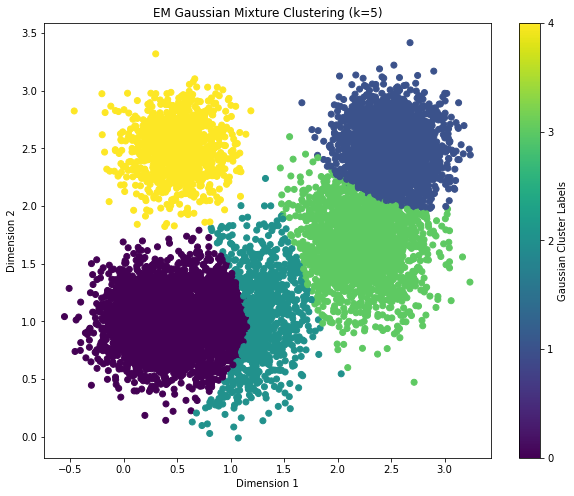

In [6]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c = np.argmax(pZ_X,axis=1))
plt.title('EM Gaussian Mixture Clustering (k=' + str(NumComponents) + ')')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(ticks=range(NumComponents), label='Gaussian Cluster Labels');

After running the algorithm for the same value $k=5$, the algorithm converges to the same solution. This consistency brings confidence on the value selected for $k$.

When we introduce clustering, we will discuss metrics that will allow to choose the value $k$ with quantitative measurements.

___

Now that we have introduced internal criteria measures, let's use it to choose the *optimal* value for $k$. Let's use ```scikit-learn``` functions:

k that maximizes the Silhouette Index is  3


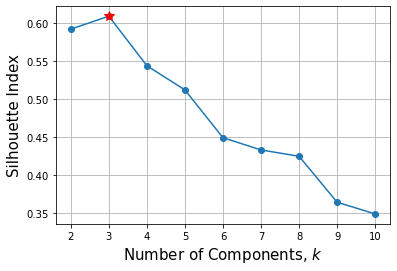

In [7]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

kvalues=range(2,11)
s=[]
for k in kvalues:
    GMM = GaussianMixture(n_components=k, random_state=0).fit(X)
    labels = GMM.predict(X)
    s+= [silhouette_score(X, labels)]
    
koptimal = kvalues[np.argmax(s)]
print('k that maximizes the Silhouette Index is ', koptimal)
plt.plot(kvalues,s,'-o'); plt.grid()
plt.plot(koptimal,s[np.argmax(s)],'*r',ms=10)
plt.xlabel('Number of Components, $k$',size=15)
plt.ylabel('Silhouette Index',size=15);

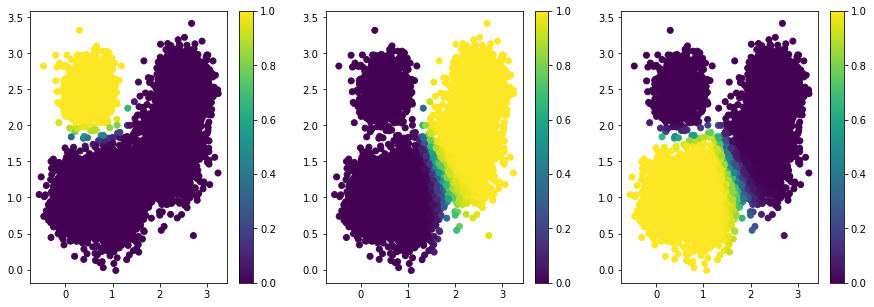

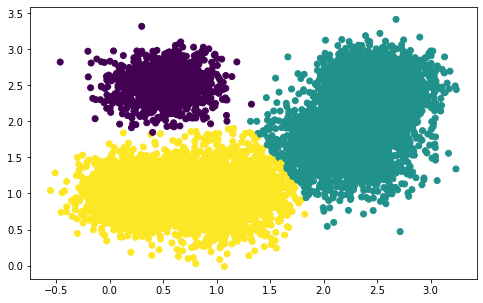

In [8]:
GMM = GaussianMixture(n_components=koptimal, random_state=0).fit(X)
labels = GMM.predict(X)
probs = GMM.predict_proba(X)

fig=plt.figure(figsize=(15,5))
for i in range(koptimal):
    ax = fig.add_subplot(1,koptimal,i+1)
    p1 = ax.scatter(X[:,0], X[:,1], c=probs[:,i])
    fig.colorbar(p1, ax=ax);
plt.show()
    
plt.figure(figsize=(8,5))
plt.scatter(X[:,0], X[:,1], c=labels);